# Numerical Optimization (CS215300) Assignment 1
## Introduction
In this assignment, we expect you to be familiar with optimization library, the numerical calculation package 'SciPy'. We are using the Rosenbrock function as the benchmark of our optimization algorithms. Rosenbrock is a simple fourth-order function has the minimal point at [1,1]. We provide a visualization function which draws the contour.
## Task
1. Please finish the TODO part, which you're going to read the document of SciPy and learn how to minimize function.
    You may refer the information in the following link:
    https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
2. Please apply SciPy library of the optimization algorithm of BFGS, Conjugate gradient, Modified Newton's method with conjugate gradient with the initilal guess [-2,2].
3. Gradient descent is not included in SciPy package, please implement "Gradient descent with optimal step length".
    Please refer page 11 of handout 2. 
4. Newton's method is not included in SciPy package, please implement "Pure Newton's method".
    Please refer page 18 of handout 2.
5. Write a concise report about:
    * Comparing the behavior of these algorithms, include the visualized plot, number of iterarions, step length etc.
    * How do you implement the Gradient descent and Newton's method algorithm 
    * Note: Write your report in the LAST cell of this notebook in Markdown Style. If you are new to Markdown, please check this tutorial link: https://www.markdowntutorial.com/ / Markdown syntax: https://www.markdownguide.org/basic-syntax/
6. Rename this notebook file with your student ID and upload it to eeclass platform. (ex. 107xxxxxx.ipynb)
    

## Import packages and visualization
If you imported extra packages, please mention in your report.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rosen, rosen_der, rosen_hess is the built-in Rosenborck function and its first and second order derivative

In [2]:
def visualize(x_iter, title):
    x0_iter = np.array([i[0] for i in x_iter])
    x1_iter = np.array([i[1] for i in x_iter])
    x = np.linspace(-2.5, 2.5, 1000)
    y = np.linspace(-3.5, 3.5, 1000)
    X, Y = np.meshgrid(x, y)
    Z = rosen([X,Y])

    anglesx = x0_iter[1:] - x0_iter[:-1]
    anglesy = x1_iter[1:] - x1_iter[:-1]

    %matplotlib inline
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z, 50, cmap = 'jet')
    ax.set_title(title)
    for i in x_iter:
        ax.scatter(i[0],i[1],color = 'r', marker = '.')

    for i in range(len(x_iter)-1):
        ax.quiver(x_iter[i][0], x_iter[i][1], anglesx[i], anglesy[i], scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)

    plt.show()

## BFGS

Iteration count:  36


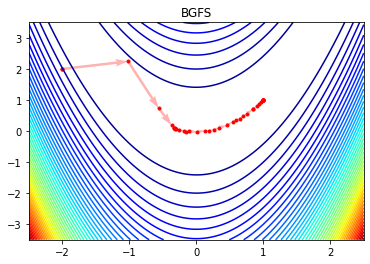

In [3]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
bfgs_steps = minimize(fun = rosen, x0 = x0, method='BFGS', options = {'return_all': True}).allvecs

for step in bfgs_steps:
  x_iter.append(step)

x_iter.insert(0,x0)
print("Iteration count: ", len(bfgs_steps))
visualize(x_iter, title = 'BGFS')

## Conjugate Gradient

Iteration count:  39


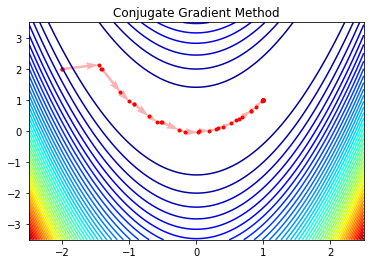

In [4]:
x0 = np.array([-2,2])
x_iter = list()
# TODO (HINT: Hessian will NOT be used in this optimize function)
cg_steps = minimize(fun = rosen, x0 = x0, method='CG', options = {'return_all': True}).allvecs

for step in cg_steps:
  x_iter.append(step)

x_iter.insert(0,x0)
print("Iteration count: ", len(cg_steps))
visualize(x_iter, title = "Conjugate Gradient Method")

## Gradient Descent with optimal step length

In [5]:
x0 = np.array([-2,2])

def gd_method(x, learning_rate):
    return rosen(x - learning_rate * rosen_der(x))

def Gradient_Descent(origin, learning_rate, epsilon=0.00001, nMax = 10000):
    step_length = list()
    x_iter = minimize(gd_method, x0 = origin, args = learning_rate, tol = epsilon, options = {'maxiter': nMax, 'return_all': True}).allvecs
    for x in range(1, len(x_iter)):
        step_length.append(x_iter[x][0] - x_iter[x-1][0])
    iter_count = len(x_iter)
    return x_iter, step_length, iter_count

Iteration count:  32


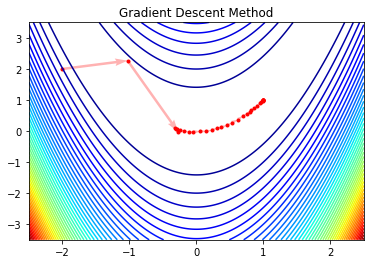

In [6]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.00005)
print("Iteration count: ", iter_count)
visualize(x_iter, title = "Gradient Descent Method")

## Pure Newton's Method

Iteration Count: 9



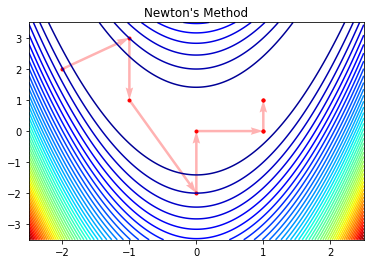

In [7]:
def Newton(Grad, Hess, x, epsilon=0.00001, nMax = 10000):
    count = 0
    error = 10
    X = np.array(x)
    x_iter, step_length = list(), list()
    x_iter.append(X)

    while np.linalg.norm(error) > epsilon and count < nMax:
        count += 1
        X_prev = X
        X = X - np.linalg.inv(Hess([x[0], x[1]])) @ Grad([x[0], x[1]])
        error = X - X_prev
        x[0], x[1] = X[0], X[1]
        step_length.append(error[0])
        x_iter.append(np.array([x[0], x[1]]))

    iter_count = len(x_iter)
    return x_iter, step_length, iter_count

x0 = np.array([-2,2])
x_iter, step_length, iter_count = Newton(rosen_der,rosen_hess,x0)
print('Iteration Count: %d\n' % iter_count)
visualize(x_iter, title = "Newton's Method")

## Modified Newton's method with conjugate gradient (Newton-CG)

Iteration count:  276


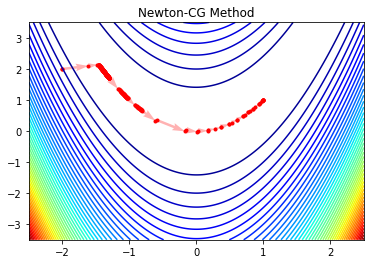

In [8]:
x0 = np.array([-2,2])
x_iter = list()
newton_cg_hess = minimize(fun = rosen, x0 = x0, method='Newton-CG', jac = rosen_der, hess = rosen_hess, options = {'return_all': True}).allvecs

for step in newton_cg_hess:
  x_iter.append(step)

x_iter.insert(0,x0)
print("Iteration count: ", len(newton_cg_hess))
visualize(x_iter, title = "Newton-CG Method")

## Report

In these assignments, there are several algorithms that are being discussed:
1. BFGS
2. Conjugate Gradient
3. Gradient Descent
4. Pure Newton's Method / Newton-Raphson Method
5. Newton Conjugate Gradient Method

# 1. BFGS, Conjugate Gradient, and Gradient Descent

BFGS, Conjugate Gradient, and Gradient Descent seem to be comparably efficient in terms of number of iterations. However, the learning rate of Gradient descent should be small enough to compete with BFGS and Conjugate Gradient. These three methods are proven to have relatively the same amount of iterations given the origin $[-2,2]$.

# 2. Gradient Descent
As for Gradient Descent Method, the function $$f(v - t f'(v)), t \geq 0$$ should be minimized. For this, I used `scipy.optimize.minimize()` function to obtain each step the algorithm needs to take in order to converge. 

In my observation, I found that as the learning rate descreases, the algorithm converges easily. Not only it converges easily, the number of iterations also descreases. Clearly, having a miniscule learning step is proven the algorithm converges. 

Learning rate: 1
Iteration count:  224


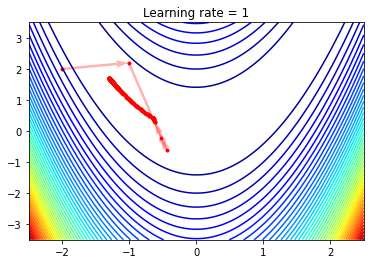

Learning rate: 0.5
Iteration count:  214


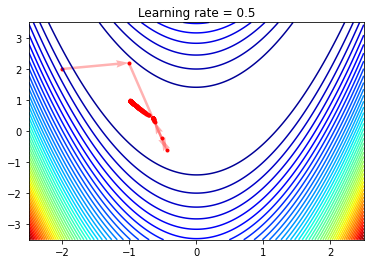

Learning rate: 0.0009
Iteration count:  39


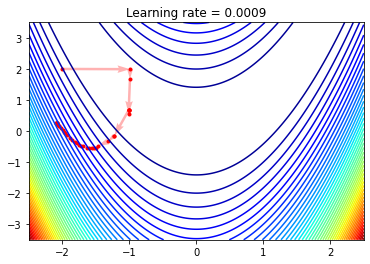

Learning rate: 0.0008
Iteration count:  26


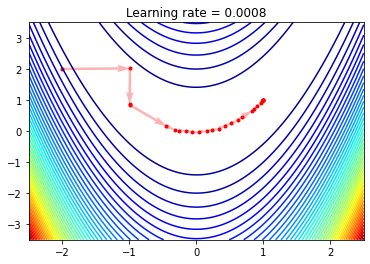

Learning rate: 0.000005
Iteration count:  37


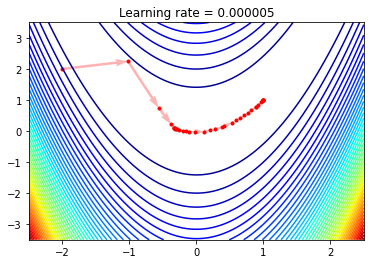

In [9]:
x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 1)
print("Learning rate: 1\nIteration count: ", iter_count)
visualize(x_iter, title = "Learning rate = 1")

x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.5)
print("Learning rate: 0.5\nIteration count: ", iter_count)
visualize(x_iter, title = "Learning rate = 0.5")

x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.0009)
print("Learning rate: 0.0009\nIteration count: ", iter_count)
visualize(x_iter, title = "Learning rate = 0.0009")

x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.0008)
print("Learning rate: 0.0008\nIteration count: ", iter_count)
visualize(x_iter, title = "Learning rate = 0.0008")

x_iter, step_length, iter_count = Gradient_Descent(origin = x0, learning_rate = 0.000005)
print("Learning rate: 0.000005\nIteration count: ", iter_count)
visualize(x_iter, title = "Learning rate = 0.000005")

# 3. Newton's Method
Newton's Method is similar to the root finding algorithm which takes form as:
$$
  x_{n+1} = x_n - \frac{f'(x_n)}{f''(x_n)}
$$

Extending to multivariate case, we replace the derivative with the gradient $\nabla f(x_n)$ and the reciprocal of the second derivative with the inverse of the Hessian matrix, we have:
$$
[H f(x_n)] \nabla x_n = - \nabla f(x_n)
$$

Thus, 
$$
  x_{n+1} = x_n - H_n^{-1} \nabla f(x_n)
$$

From that equation, I converted it into Python code
```python
  X_prev = X
  X = X - np.linalg.inv(Hess([x[0], x[1]])) @ Grad([x[0], x[1]])
```

From the observation, I found that this method is the most efficient one since it converges quadratically and only requires 9 steps to converge.

# 4. Newton's Method and Newton-CG Method

These two methods are quite the opposite. Newton's Method is way too efficient considering the amount of iterations it needs to converge. While Newton-CG requires more than 200 iterations. However, Newton's Method has a week point where it's more attracted to saddle points. Since saddle points are common in Machine Learning, this method will suffer more often than the other methods.